# üìâ Part 6: Seaborn Introduction and Line Plot Fundamentals (Mapping from Matplotlib Part 1)

**Goal:** Understand Seaborn's fundamental approach (Axes-level vs. Figure-level functions), master the basics of creating and customizing line plots using Pandas Series and DataFrame columns with `seaborn.lineplot` and `seaborn.relplot`.

---

### Key Learning Objectives

1.  Understand the difference between Seaborn's **Axes-level** (e.g., `sns.lineplot`) and **Figure-level** (e.g., `sns.relplot`) functions.
2.  Learn how to plot Pandas **Series** (index as X-axis) and **DataFrame columns** (explicit X/Y) using Seaborn.
3.  Customize line appearance using colors, markers, and line styles within Seaborn functions.
4.  Use **Subplots** with Seaborn, leveraging Matplotlib's subplot creation for Axes-level functions.

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set pandas display options (optional, kept from original)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Set a Seaborn theme (styles the plot automatically)
# Common options: "darkgrid", "whitegrid", "dark", "white", "ticks"
sns.set_theme(style="whitegrid") 

print("LAB 6.1: ENVIRONMENT SETUP.")
print("‚úÖ Seaborn, Matplotlib, and pandas imported successfully!")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}") 
print(f"Pandas version: {pd.__version__}\n")

LAB 6.1: ENVIRONMENT SETUP.
‚úÖ Seaborn, Matplotlib, and pandas imported successfully!
Seaborn version: 0.13.2
Matplotlib version: 3.10.0
Pandas version: 2.2.3



### 2: First Plot (Basic Axes-level Interface)

The simplest way to plot with Seaborn often involves **Axes-level** functions like `sns.lineplot()`. We pass the DataFrame and specify columns for x and y.

LAB 6.2: FIRST SEABORN PLOT WITH PANDAS DATA.


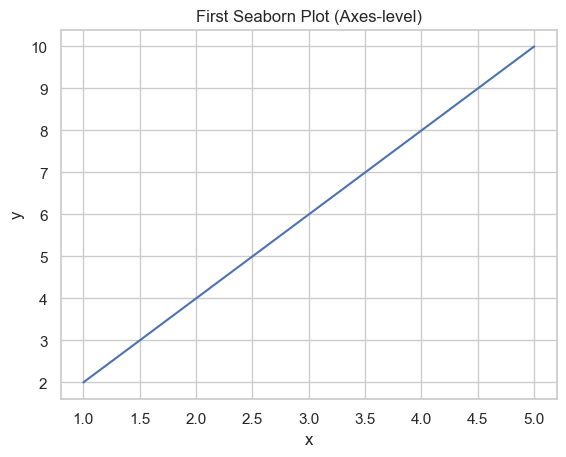


üéâ You've created your first Seaborn plot with pandas data!


In [2]:
print("LAB 6.2: FIRST SEABORN PLOT WITH PANDAS DATA.")

# Create simple data using pandas
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10]
})

# Create the plot using sns.lineplot
# Note: We pass the DataFrame to `data` and column names to `x` and `y`
sns.lineplot(data=data, x='x', y='y') 

# We can still use plt functions for titles, etc.
plt.title("First Seaborn Plot (Axes-level)") 
plt.show()

print("\nüéâ You've created your first Seaborn plot with pandas data!")

### 3: Figure vs. Axes Concepts (Seaborn's Core Distinction)

This is crucial in Seaborn:

* **Axes-level functions:** Plot onto a *single* Matplotlib Axes (like `sns.lineplot`). You control the Figure and Subplots using Matplotlib (`plt.subplots`). Customization often uses `ax.set_...` methods.
* **Figure-level functions:** Create the *entire Figure*, potentially with multiple Axes managed by a Seaborn `FacetGrid` (like `sns.relplot`). Customization uses methods on the returned grid object (often called `g`).

`sns.lineplot` is Axes-level. Its Figure-level counterpart is `sns.relplot(kind='line')`.

### 4: Plotting with the Object-Oriented Style (Axes-level)

This mirrors Matplotlib's OO approach. Create Matplotlib Figure/Axes first, then tell Seaborn *which Axes* to draw on using the `ax=` parameter.


LAB 6.3: SEABORN WITH MATPLOTLIB OO STYLE (Axes-level).


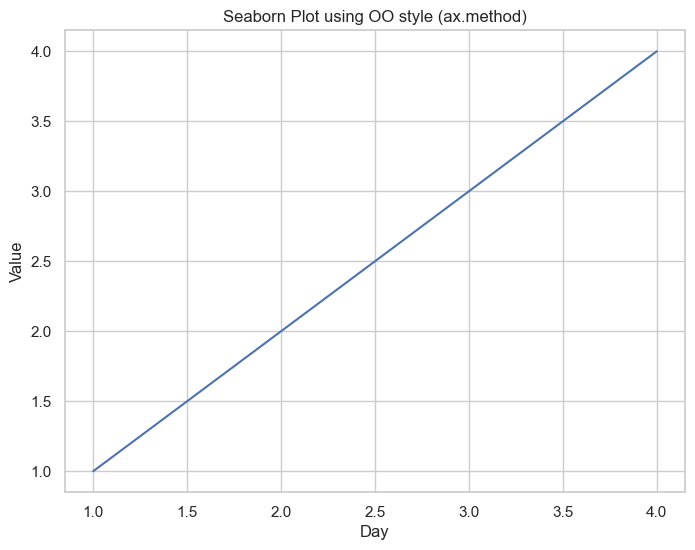

üìö Key Concepts:
‚Ä¢ Figure = The entire window/canvas (created by plt.subplots)
‚Ä¢ Axes = The actual plot area (passed to sns.lineplot via ax=)


In [3]:
print(f"\nLAB 6.3: SEABORN WITH MATPLOTLIB OO STYLE (Axes-level).")

# Create sample pandas data
df = pd.DataFrame({
    'day': [1, 4, 2, 3],
    'value': [1, 4, 2, 3]
})

# Method 2: Seaborn with Matplotlib's Object-oriented interface (Preferred for control)
fig, ax = plt.subplots(figsize=(8, 6)) 

# Pass the created 'ax' to Seaborn's Axes-level function
sns.lineplot(data=df, x='day', y='value', ax=ax) 

# Use 'ax' methods for customization (just like Matplotlib OO)
ax.set_title("Seaborn Plot using OO style (ax.method)")
ax.set_xlabel("Day")
ax.set_ylabel("Value")
plt.show()

print("üìö Key Concepts:")
print("‚Ä¢ Figure = The entire window/canvas (created by plt.subplots)")
print("‚Ä¢ Axes = The actual plot area (passed to sns.lineplot via ax=)")

### 5: Line Plot Fundamentals with Seaborn

Seaborn prefers explicit `x` and `y` from a DataFrame.

* **Plotting a Series:** If you pass a Pandas Series to `y` (or just `data=`), Seaborn *can* use the index for the X-axis.
* **Plotting DataFrame Columns:** This is the standard Seaborn approach using `data=`, `x=`, and `y=`.

LAB 6.4: SEABORN LINE PLOT FUNDAMENTALS WITH PANDAS.


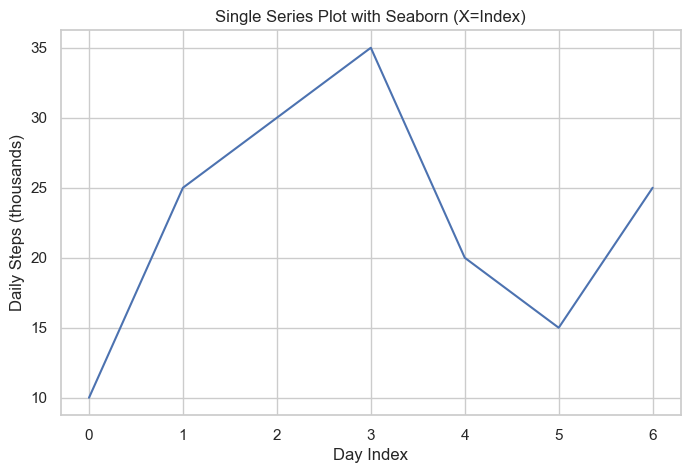

üìù Notice: x-axis uses pandas Series index automatically!


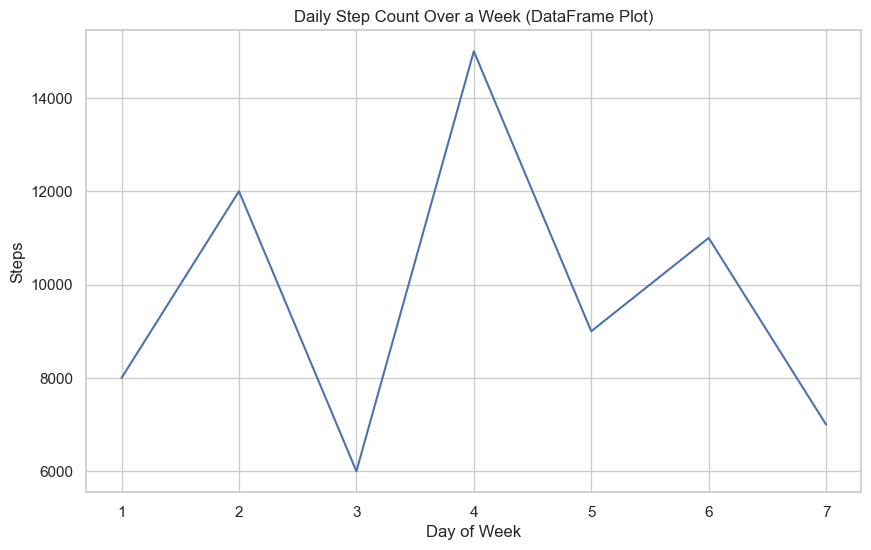

In [4]:
print("LAB 6.4: SEABORN LINE PLOT FUNDAMENTALS WITH PANDAS.")

# Create a pandas Series 
steps_data = pd.Series([10, 25, 30, 35, 20, 15, 25], 
                        name='Daily Steps (thousands)')

plt.figure(figsize=(8, 5))
# Plotting a Series directly (Seaborn uses the index for x)
sns.lineplot(data=steps_data) 
plt.title("Single Series Plot with Seaborn (X=Index)")
plt.xlabel("Day Index")
plt.ylabel(steps_data.name)
plt.show()

print("üìù Notice: x-axis uses pandas Series index automatically!")

# Create a DataFrame
weekly_data = pd.DataFrame({
    'day': [1, 2, 3, 4, 5, 6, 7],
    'steps': [8000, 12000, 6000, 15000, 9000, 11000, 7000],
    'day_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
})

plt.figure(figsize=(10, 6))
# Plotting DataFrame columns (Standard Seaborn way)
sns.lineplot(data=weekly_data, x='day', y='steps') 
plt.title("Daily Step Count Over a Week (DataFrame Plot)")
plt.xlabel("Day of Week")
plt.ylabel("Steps")
# plt.grid(True) # Often handled by sns.set_theme()
plt.show()

### 6: Basic Line Customization and Subplots

Customization arguments (`color`, `linestyle`, `marker`) are passed directly to `sns.lineplot`. For manual subplots, create them with `plt.subplots` and plot onto each axis.


LAB 6.5: BASIC LINE CUSTOMIZATION & SUBPLOTS WITH SEABORN.


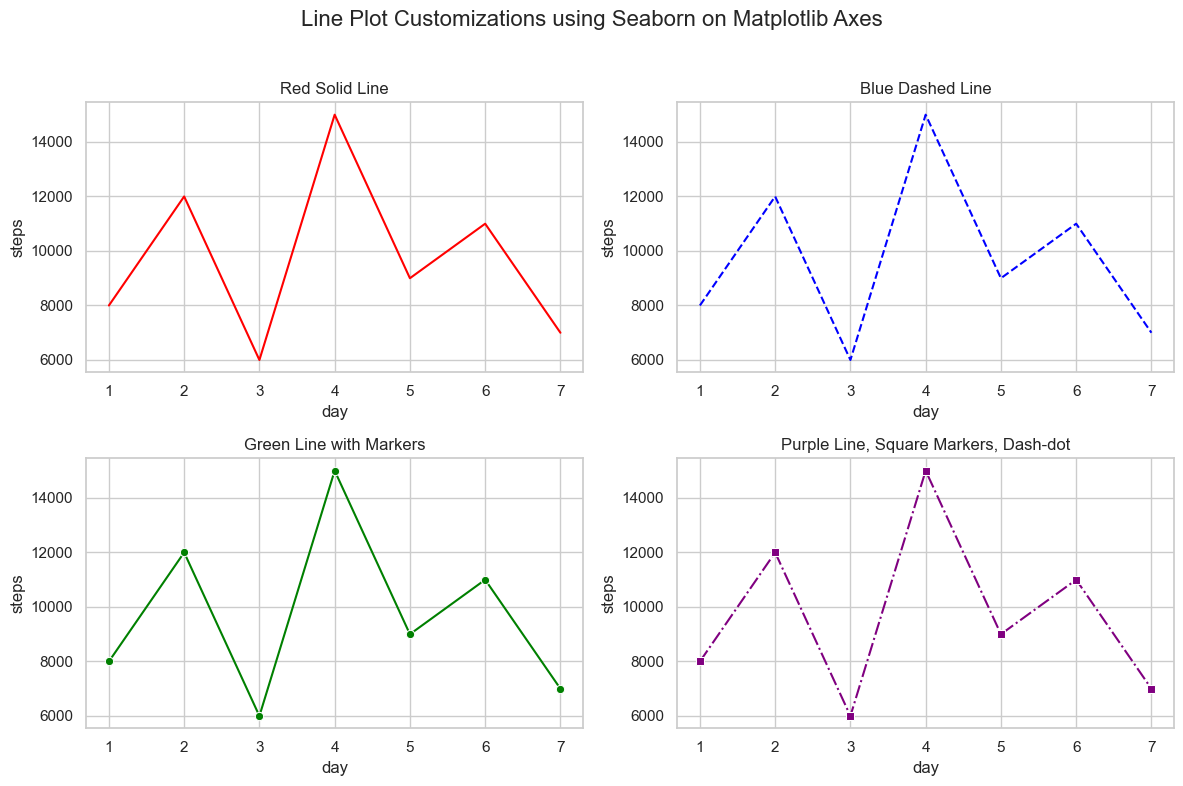


üé® Customization arguments are passed directly to sns.lineplot:
‚Ä¢ Color: `color='red'` or `color='#FF5733'`
‚Ä¢ Line Style: `linestyle='--'` (dashed) or `linestyle=':'` (dotted)
‚Ä¢ Markers: `marker='o'` (circle) or `marker='s'` (square)


In [5]:
print(f"\nLAB 6.5: BASIC LINE CUSTOMIZATION & SUBPLOTS WITH SEABORN.")

# Use the same DataFrame from before
weekly_data = pd.DataFrame({
    'day': [1, 2, 3, 4, 5, 6, 7],
    'steps': [8000, 12000, 6000, 15000, 9000, 11000, 7000],
    'day_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
})

# Create a figure and a 2x2 grid of subplots using Matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
fig.suptitle("Line Plot Customizations using Seaborn on Matplotlib Axes", fontsize=16) # Overall title

# Plot 1: Red solid line
sns.lineplot(data=weekly_data, x='day', y='steps', color='red', ax=axes[0, 0])
axes[0, 0].set_title("Red Solid Line")

# Plot 2: Blue dashed line
sns.lineplot(data=weekly_data, x='day', y='steps', color='blue', linestyle='--', ax=axes[0, 1])
axes[0, 1].set_title("Blue Dashed Line")

# Plot 3: Green line with markers
sns.lineplot(data=weekly_data, x='day', y='steps', color='green', marker='o', ax=axes[1, 0])
axes[1, 0].set_title("Green Line with Markers")

# Plot 4: Purple line, square markers, dash-dot style
sns.lineplot(data=weekly_data, x='day', y='steps', color='purple', marker='s', linestyle='-.', ax=axes[1, 1])
axes[1, 1].set_title("Purple Line, Square Markers, Dash-dot")

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

print("\nüé® Customization arguments are passed directly to sns.lineplot:")
print("‚Ä¢ Color: `color='red'` or `color='#FF5733'`")
print("‚Ä¢ Line Style: `linestyle='--'` (dashed) or `linestyle=':'` (dotted)")
print("‚Ä¢ Markers: `marker='o'` (circle) or `marker='s'` (square)")

### 7: Practice Project: Titanic Age Profile (Seaborn version)

Combine concepts: Pandas data, Seaborn line plot, Matplotlib customization/annotation.


üéØ PRACTICE PROJECT: Titanic Age Visualization with Seaborn
üíæ Plot saved as 'seaborn_part6_age_profile.png'


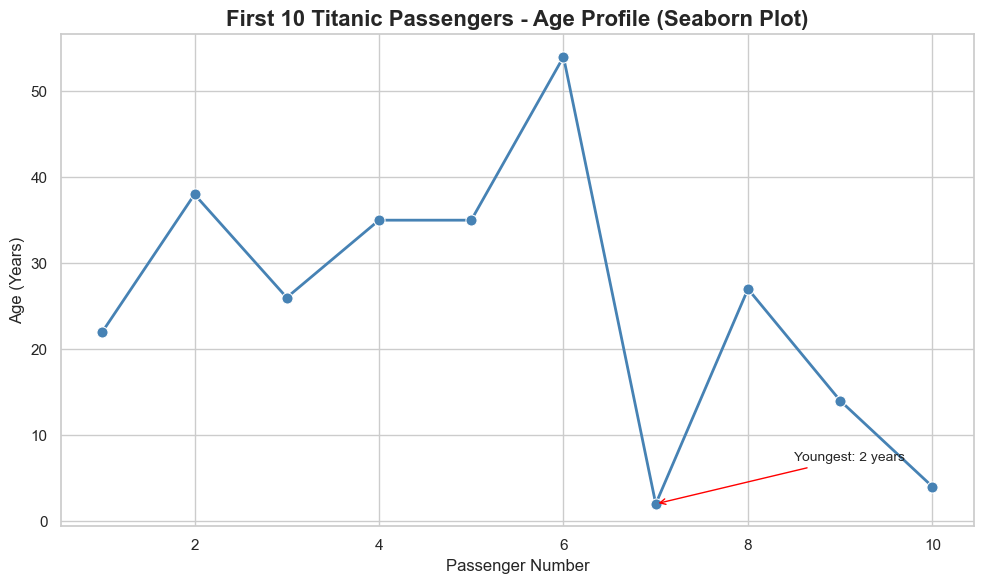


üéâ Seaborn Part 6 (mapping from Matplotlib Part 1) complete!


In [6]:
print("\nüéØ PRACTICE PROJECT: Titanic Age Visualization with Seaborn")

# Sample data mimicking the first 10 passengers
titanic_sample = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4],
    'PassengerId': range(1, 11)
})

# Create the plot using Seaborn's lineplot (Axes-level)
plt.figure(figsize=(10, 6)) # Create the Matplotlib figure first
ax = sns.lineplot(data=titanic_sample, x='PassengerId', y='Age', 
                  color='steelblue', marker='o', linewidth=2, markersize=8)

# Use Matplotlib/ax methods for customization
ax.set_title('First 10 Titanic Passengers - Age Profile (Seaborn Plot)', fontsize=16, fontweight='bold')
ax.set_xlabel('Passenger Number', fontsize=12)
ax.set_ylabel('Age (Years)', fontsize=12)
# ax.grid(True, alpha=0.3) # Usually handled by sns.set_theme()

# Find and annotate the youngest passenger (Pandas logic remains the same)
youngest_idx = titanic_sample['Age'].idxmin()
youngest_age = titanic_sample['Age'].min()
youngest_passenger = titanic_sample['PassengerId'][youngest_idx]

# Use Matplotlib's annotate on the axes 'ax'
ax.annotate(f'Youngest: {youngest_age} years', 
             xy=(youngest_passenger, youngest_age),
             xytext=(youngest_passenger + 1.5, youngest_age + 5), # Offset the text
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, ha='left') 

plt.tight_layout()

# Save the plot (using Matplotlib's savefig)
plt.savefig('seaborn_part6_age_profile.png', dpi=300, bbox_inches='tight')
print("üíæ Plot saved as 'seaborn_part6_age_profile.png'")
plt.show()

print("\nüéâ Seaborn Part 6 (mapping from Matplotlib Part 1) complete!")